# Problem 2
## 20M10293 Daisuke Kikuta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset IV

In [2]:
n = 200
x_d4 = 3*(np.random.rand(n, 4) - 0.5)
y_d4 = (2*x_d4[:, 0] - 1*x_d4[:,1] + 0.5 + 0.5*np.random.randn(n)) > 0
y_d4 = 2*y_d4 - 1

y_d4 = y_d4.reshape((1, 200))

## Parameters

In [3]:
hp  = 0.5  # hyper parameter: lambda
itr = 300  # number of iteration

la, v = np.linalg.eigh(np.dot(x_d4[:,:-1].T, x_d4[:,:-1]) + 8*hp*np.eye(3))
L = 0.25*np.max(la) # lipschitz constant

## 1. Batch steepest gradient method

In [4]:
w = np.zeros(3)
w = w.reshape(1,3)

loss_sgm_history = []
w_sgm_history = []
loss = 0.

for t in range (1, itr + 1):
    exp_t = 1 + np.exp(-y_d4.T*(np.dot(x_d4[:,:-1], w.T) + x_d4[:,-1].reshape((200, 1)))) # dim=(200, 1)
    p = 1/exp_t # dim=(200, 1)

    grad = (np.dot(x_d4[:,:-1].T, -y_d4.T*(1 - p))).T + 2*hp*w # dim=(1, 3)
    loss = np.sum(np.log(exp_t)) + hp*(np.dot(w, w.T) + 1)     # dim=(1, 1)

    w_sgm_history.append(w)
    loss_sgm_history.append(np.float64(loss))

    w = w - 1/L*grad # dim=(1, 3)

## 2. Newton based method

In [5]:
w = np.zeros(3)
w = w.reshape(1, 3)

loss_ntn_history = []
w_ntn_history    = []
loss = 0.

for t in range (1, itr + 1):
    exp_t = 1 + np.exp(-y_d4.T*(np.dot(x_d4[:,:-1], w.T) + x_d4[:,-1].reshape((200, 1))))
    p = 1/exp_t

    grad = (np.dot(x_d4[:,:-1].T, -y_d4.T * (1 - p))).T + 2*hp*w
    hess = np.dot(x_d4[:,:-1].T, (p*(1 - p)*x_d4[:,:-1])) + 2*hp*np.eye(3) # dim=(3, 3)

    loss = np.sum(np.log(exp_t)) + hp*(np.dot(w, w.T) + 1)

    w_ntn_history.append(w)
    loss_ntn_history.append(np.float64(loss))

    w = w - np.dot(grad, np.linalg.inv(hess).T)

## 3. Comparison of the two methods

Text(0, 0.5, '| J(w) - J(w_opt)|')

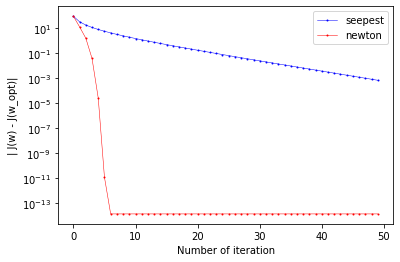

In [6]:
base = min(min(loss_sgm_history), min(loss_ntn_history))

show_itr = 50

plt.plot(np.abs(loss_sgm_history[:show_itr] - base), "bo-", linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(loss_ntn_history[:show_itr] - base), "ro-", linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale("log")
plt.xlabel("Number of iteration")
plt.ylabel("| J(w) - J(w_opt)|")

## 4. 